**Srayan Gangopadhyay**
*17th May 2020*

# Testing Runge-Kutta method for 2nd-order ODEs

## Introducing the code

**1. Docstring, importing required modules, and info about correct form of ODE**

To solve a second-order differential equation using the Runge-Kutta method, we first need to rewrite it as two first-order ODEs as explained in the comment below.

In [1]:
"""
Upgrading Euler method to 4th-order Runge-Kutta
for 2nd-order ODEs
Srayan Gangopadhyay
2020-05-17
"""

import numpy as np
import matplotlib.pyplot as plt

# y' = dy/dx
# For a function of form y'' = f(x, y, y')
# Define y' = v so y'' = v'

**2. Function definition and parameters**

For the function $y'' = f(x, y, y')$ with initial conditions $y(x=0) = y_0$ and $y'(x=0) = y'_0$, the code takes as its input the right hand side of the equation $v' = f(x, y, v)$ where $v = y'$, as well as the initial conditions.

We also define the step size $h$, which determines the precision, and the $x$-value up to which we will integrate. From these parameters, the number of steps is calculated and empty arrays are initialised to hold the values for $y$ and $y'$, which will be determined by integration.

For the tests in this notebook, the problems and solutions are taken from Paul's Online Notes \[1].

In [2]:
def func(x, y, v):  # RHS of v' = in terms of x, y, v
    return 9*y

# PARAMETERS
y0 = 2  # y(x=0) = 
v0 = -1  # y'(x=0) = 
h = 0.01  # step size
end = 3  # x-value to stop integration

steps = int(end/h)  # number of steps
x = np.linspace(0, end, steps)  # array of x-values (discrete time)
y = np.zeros(steps)  # empty array for solution
v = np.zeros(steps)

y[0] = y0  # inserting initial value
v[0] = v0

**3. Integrating using RK4 algorithm**

There are a few different definitions of the 4th-order Runge-Kutta algorithm, we chose to use the Wolfram Mathworld definition \[2].

In [3]:
# INTEGRATING
# using https://mathworld.wolfram.com/Runge-KuttaMethod.html
for i in range(0, steps-1):
    k1y = h * v[i]
    k1v = h * func(x[i], y[i], v[i])
    k2y = h * (v[i] + 0.5*k1v)
    k2v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k1v), (v[i] + 0.5*k1v))
    k3y = h * (v[i] + 0.5*k2v)
    k3v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k2v), (v[i] + 0.5*k2v))
    k4y = h * (v[i] + k3v)
    k4v = h * func(x[i+1], (y[i] + k3v), (v[i] + k3v))
    
    y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    v[i+1] = v[i] + (k1v + 2*k2v + 2*k3v + k4v) / 6

**4. Plotting**

We then plot the calculated solution as well as, for these test cases, the known analytical solution.

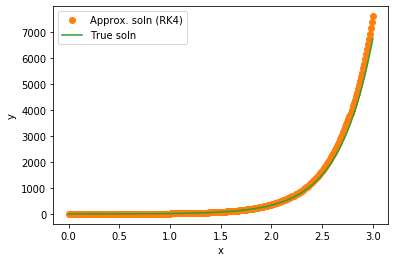

In [4]:
plt.plot(x, y)
plt.plot(x, y, 'o', label='Approx. soln (RK4)')
plt.plot(x, (7/6)*np.exp(-3*x) + (5/6)*np.exp(3*x), label='True soln')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We can see that the RK4 algorithm gives a solution which closely approximates the true solution, although the error grows with increasing $x$ (as expected for this type of numerical method.)

## More test cases

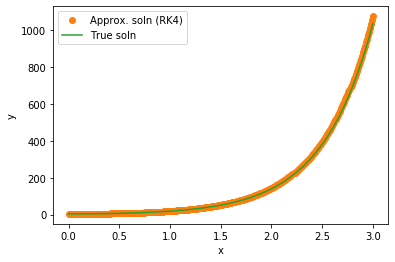

In [5]:
def func(x, y, v):  # RHS of v' = in terms of x, y, v
    return -3*v + 10*y

# PARAMETERS
y0 = 4  # y(x=0) = 
v0 = -2  # y'(x=0) = 
h = 0.01  # step size
end = 3  # x-value to stop integration

steps = int(end/h)  # number of steps
x = np.linspace(0, end, steps)  # array of x-values (discrete time)
y = np.zeros(steps)  # empty array for solution
v = np.zeros(steps)

y[0] = y0  # inserting initial value
v[0] = v0

# INTEGRATING
# using https://mathworld.wolfram.com/Runge-KuttaMethod.html
for i in range(0, steps-1):
    k1y = h * v[i]
    k1v = h * func(x[i], y[i], v[i])
    k2y = h * (v[i] + 0.5*k1v)
    k2v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k1v), (v[i] + 0.5*k1v))
    k3y = h * (v[i] + 0.5*k2v)
    k3v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k2v), (v[i] + 0.5*k2v))
    k4y = h * (v[i] + k3v)
    k4v = h * func(x[i+1], (y[i] + k3v), (v[i] + k3v))
    
    y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    v[i+1] = v[i] + (k1v + 2*k2v + 2*k3v + k4v) / 6

plt.plot(x, y)
plt.plot(x, y, 'o', label='Approx. soln (RK4)')
plt.plot(x, (10/7)*np.exp(-5*x) + (18/7)*np.exp(2*x), label='True soln')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

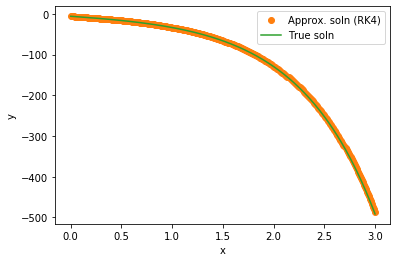

In [6]:
def func(x, y, v):  # RHS of v' = in terms of x, y, v
    return (-2/3)*v + (8/3)*y

# PARAMETERS
y0 = -6  # y(x=0) = 
v0 = -18  # y'(x=0) = 
h = 0.01  # step size
end = 3  # x-value to stop integration

steps = int(end/h)  # number of steps
x = np.linspace(0, end, steps)  # array of x-values (discrete time)
y = np.zeros(steps)  # empty array for solution
v = np.zeros(steps)

y[0] = y0  # inserting initial value
v[0] = v0

# INTEGRATING
# using https://mathworld.wolfram.com/Runge-KuttaMethod.html
for i in range(0, steps-1):
    k1y = h * v[i]
    k1v = h * func(x[i], y[i], v[i])
    k2y = h * (v[i] + 0.5*k1v)
    k2v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k1v), (v[i] + 0.5*k1v))
    k3y = h * (v[i] + 0.5*k2v)
    k3v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k2v), (v[i] + 0.5*k2v))
    k4y = h * (v[i] + k3v)
    k4v = h * func(x[i+1], (y[i] + k3v), (v[i] + k3v))
    
    y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    v[i+1] = v[i] + (k1v + 2*k2v + 2*k3v + k4v) / 6

plt.plot(x, y)
plt.plot(x, y, 'o', label='Approx. soln (RK4)')
plt.plot(x, (-9)*np.exp((4/3)*x) + (3)*np.exp(-2*x), label='True soln')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

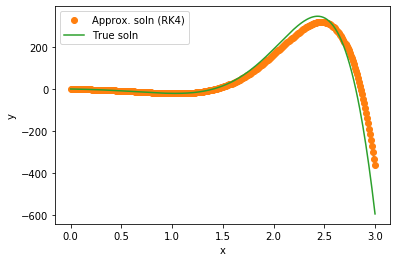

In [7]:
def func(x, y, v):  # RHS of v' = in terms of x, y, v
    return 4*v - 9*y

# PARAMETERS
y0 = 0  # y(x=0) = 
v0 = -8  # y'(x=0) = 
h = 0.01  # step size
end = 3  # x-value to stop integration

steps = int(end/h)  # number of steps
x = np.linspace(0, end, steps)  # array of x-values (discrete time)
y = np.zeros(steps)  # empty array for solution
v = np.zeros(steps)

y[0] = y0  # inserting initial value
v[0] = v0

# INTEGRATING
# using https://mathworld.wolfram.com/Runge-KuttaMethod.html
for i in range(0, steps-1):
    k1y = h * v[i]
    k1v = h * func(x[i], y[i], v[i])
    k2y = h * (v[i] + 0.5*k1v)
    k2v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k1v), (v[i] + 0.5*k1v))
    k3y = h * (v[i] + 0.5*k2v)
    k3v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k2v), (v[i] + 0.5*k2v))
    k4y = h * (v[i] + k3v)
    k4v = h * func(x[i+1], (y[i] + k3v), (v[i] + k3v))
    
    y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    v[i+1] = v[i] + (k1v + 2*k2v + 2*k3v + k4v) / 6

plt.plot(x, y)
plt.plot(x, y, 'o', label='Approx. soln (RK4)')
plt.plot(x, (-8/np.sqrt(5))*np.exp(2*x)*np.sin(x*np.sqrt(5)), label='True soln')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

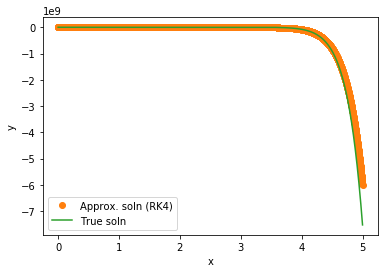

In [8]:
def func(x, y, v):  # RHS of v' = in terms of x, y, v
    return 8*v - 17*y

# PARAMETERS
y0 = -4  # y(x=0) = 
v0 = -1  # y'(x=0) = 
h = 0.001  # step size
end = 5  # x-value to stop integration

steps = int(end/h)  # number of steps
x = np.linspace(0, end, steps)  # array of x-values (discrete time)
y = np.zeros(steps)  # empty array for solution
v = np.zeros(steps)

y[0] = y0  # inserting initial value
v[0] = v0

# INTEGRATING
# using https://mathworld.wolfram.com/Runge-KuttaMethod.html
for i in range(0, steps-1):
    k1y = h * v[i]
    k1v = h * func(x[i], y[i], v[i])
    k2y = h * (v[i] + 0.5*k1v)
    k2v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k1v), (v[i] + 0.5*k1v))
    k3y = h * (v[i] + 0.5*k2v)
    k3v = h * func((x[i] + 0.5*h), (y[i] + 0.5*k2v), (v[i] + 0.5*k2v))
    k4y = h * (v[i] + k3v)
    k4v = h * func(x[i+1], (y[i] + k3v), (v[i] + k3v))
    
    y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6
    v[i+1] = v[i] + (k1v + 2*k2v + 2*k3v + k4v) / 6

plt.plot(x, y)
plt.plot(x, y, 'o', label='Approx. soln (RK4)')
plt.plot(x, -4*np.exp(4*x)*np.cos(x)+15*np.exp(4*x)*np.sin(x), label='True soln')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Sources

\[1]: P. Dawkins, Differential Equations - Real & Distinct Roots, 06-Mar-2018. \[Online]. Available: https://tutorial.math.lamar.edu/Classes/DE/RealRoots.aspx. \[Accessed: 17-May-2020].

\[2]: E. W. Weisstein, “Runge-Kutta Method,” Wolfram MathWorld. \[Online]. Available: https://mathworld.wolfram.com/Runge-KuttaMethod.html. \[Accessed: 17-May-2020].